In [1]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pandas as pd

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image
import pydotplus
from matplotlib.pyplot import imshow

""" image trasformation packages """
from PIL import Image
import skimage.io as skio

""" statistical data visualization packages"""
import seaborn as sns

""" machine learning functions """
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
from funcoes import *

In [3]:
captchas_files = sorted(glob('../testes/captcha_teste*.png'))
imgs = skio.imread_collection(captchas_files)

In [4]:
unblobbed = [remove_small_blobs(img, min_area=50, background=255) for img in imgs]

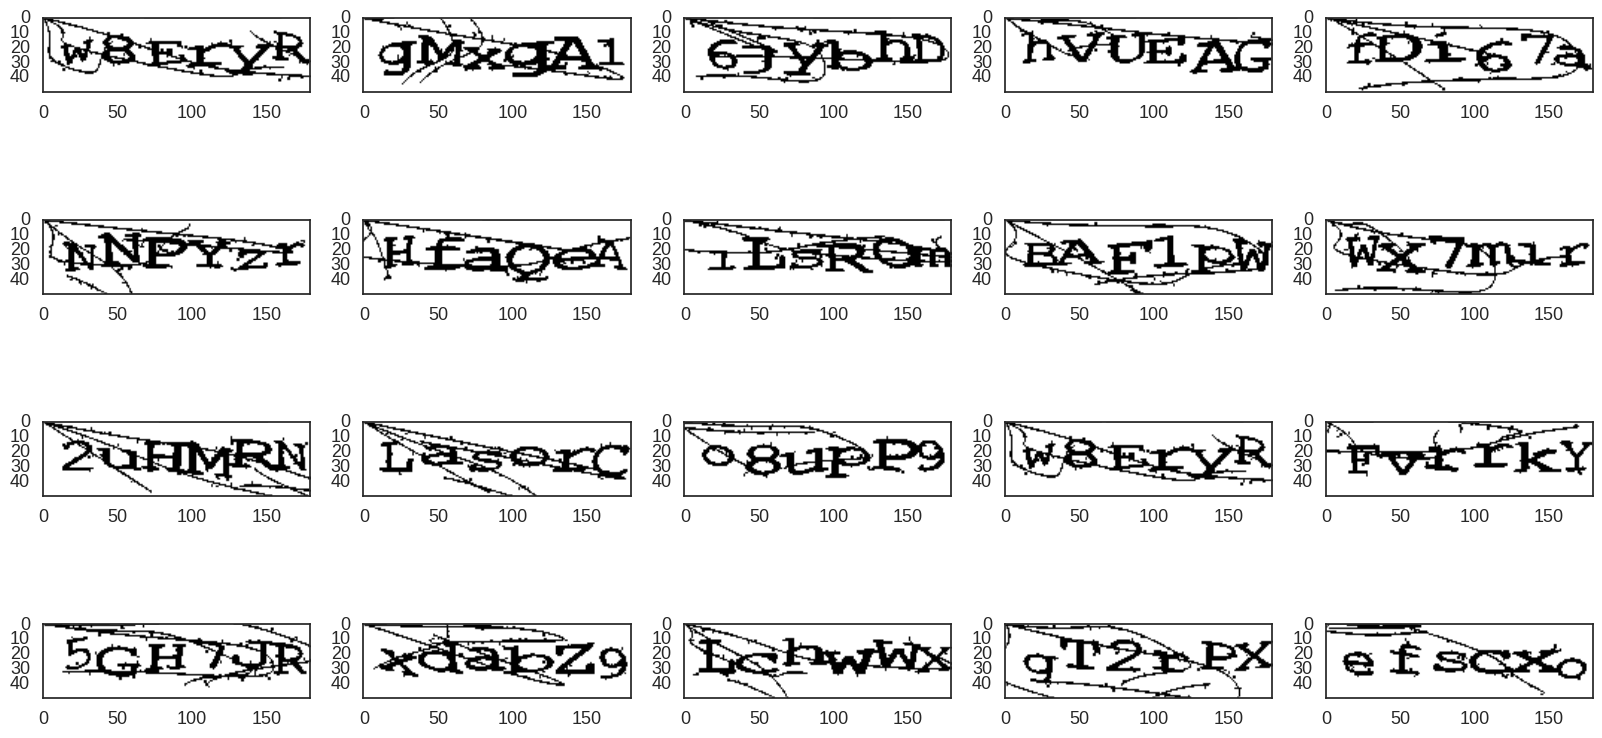

In [5]:
plot_captchas( unblobbed, (4, 5) )

In [6]:
certo = ['w8EryR', 'gMxgA1', '6jybhD', 'hVUEAG', 'fDi67a',
        'NNPYzr', 'HfaQeA', 'iLsROm', 'BAF1pW', 'Wx7m1r',
        '2uHMRN', 'Lasorc', 'o8upp9', 'w8EryR', 'FvrrkY',
        '5GH7JR', 'xdabZ9', 'Lchwwx', 'gT2rPX', 'efsCXo']

# Tentativa com Tesseract

In [7]:
%%time
%%capture
respostasTS = []
for i, captcha in enumerate(unblobbed):
    resposta = tsrct_captcha(captcha)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasTS.append(resposta)

CPU times: user 212 ms, sys: 400 ms, total: 612 ms
Wall time: 17.2 s


In [8]:
print(respostasTS)

['      ', '      ', '      ', '      ', '      ', '     ﬁf', '      ', '      ', 'E     ', '      ', '      ', '      ', '  A   ', '      ', '    7““? ', 'm     ', 'M     ', '      ', '      ', '      ']


# Tentativa com funções super_score

In [9]:
%%time
%%capture
respostasSS = []
v = 1 # super score possui 3 versões até o momento (3 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS.append(resposta)

CPU times: user 59min 42s, sys: 13.2 s, total: 59min 55s
Wall time: 59min 55s


In [10]:
print(respostasSS)

['ZZZZyZ', 'ZMZgZZ', 'ZZyZZZ', 'ZZZZAZ', 'ZZZZZZ', 'ZZZZZZ', 'ZZeZeZ', 'ZZZZZw', 'ZZFZpZ', 'ZZZZZZ', 'ZZHMZZ', 'ZZZZZZ', 'ZZZZZZ', 'ZZZZyZ', 'ZZZZZZ', 'ZZZZZZ', 'ZZZZZZ', 'ZZZZZZ', 'ZZZZZZ', 'ZZZZxZ']


# Tentativa com funções super_score2

In [11]:
%%time
%%capture
respostasSS2 = []
v = 2 # super score possui 3 versões até o momento (3 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS2.append(resposta)

CPU times: user 59min 2s, sys: 8.84 s, total: 59min 11s
Wall time: 59min 10s


In [12]:
print(respostasSS2)

['g8RryH', 'gMvgA1', '8KybpZ', 'hVUBAE', 'fOo67a', 'rNP1sr', 'HfsoeA', 'zLGEWK', 'BAF1pk', 'kM7mLr', '9uHMBk', 'nMssrE', 'q6upPU', 'g8RryH', 'PyrTkC', 'DQH7aK', 'xdaEEs', 'toRwHR', 'eT2zpK', 'e1cdxa']


# Tentativa com funções super_score3

In [13]:
%%time
%%capture
respostasSS3 = []
v = 3 # super score possui 3 versões até o momento (3 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS3.append(resposta)

CPU times: user 1h 4min 9s, sys: 11.3 s, total: 1h 4min 21s
Wall time: 1h 4min 21s


In [14]:
print(respostasSS3)

['jjjjjj', 'jjjjjj', 'jjjjjj', 'jjjUjj', 'jjjjjj', 'jjjj5j', 'jjjjjj', 'UjjU5j', 'jjjjjj', 'jjjjjj', 'jjjjjj', 'jjjjjj', 'jjjjjj', 'jjjjjj', 'jjjjjU', 'jjjjjj', 'jjjjjj', 'jjjjjj', 'Ujjjjj', 'jjjjjj']


# Tentativa com modelo ML

## Balanced

In [15]:
%%time
%%capture
respostasML1 = []
for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha, tipo = "_balanced")
    #print("resposta "+ str(i) + ": " + resposta)
    respostasML1.append(resposta)

CPU times: user 2h 1min 46s, sys: 41.5 s, total: 2h 2min 27s
Wall time: 2h 2min 49s


In [16]:
print(respostasML1)

['1xr7a1', '7jH7sH', '7ss7xE', 'jrsWyP', 's1s1s7', 's1gaHP', 'sHu77W', 'HH7WHY', 'h7ss7H', 'sHp7PH', 'jEq717', 'sr77W8', '81H7gn', '1xr7a1', 'HWHnjH', 'HV1ssH', 'PPE1jR', 'V7xPsW', '7s877g', 'HsW77B']


## Unbalanced

In [17]:
%%time
%%capture
#respostasML2 = []
#for i, captcha in enumerate(unblobbed):
#    resposta = modela_captcha(captcha, tipo = "RF")
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasML2.append(resposta)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.3 ms


In [18]:
#print(respostasML2)

# Avaliação

In [19]:
ML1 = []
#ML2 = []
tesseract = []
super_score = []
super_score2 = []
super_score3 = []
for i, captcha in enumerate(certo):

    ML1.append(0)
    #ML2.append(0)
    tesseract.append(0)
    super_score.append(0)
    super_score2.append(0)
    super_score3.append(0)
    
    for j, letra in enumerate(captcha):

        if (letra == respostasTS[i][j]):
            tesseract[i] += 1
            
        if (letra == respostasML1[i][j]):
            ML1[i] += 1
        #if (letra == respostasML2[i][j]):
        #    ML2[i] += 1
            
        if (letra == respostasSS[i][j]):
            super_score[i] += 1
        if (letra == respostasSS2[i][j]):
            super_score2[i] += 1
        if (letra == respostasSS3[i][j]):
            super_score3[i] += 1

In [20]:
print(tesseract)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
print("pontos totais: " + str(sum(tesseract)/(20*6)))

pontos totais: 0.0


In [22]:
#print(ML2)

In [23]:
#print("pontos totais: " + str(sum(ML2)/(20*6)))

In [24]:
print(ML1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
print("pontos totais: " + str(sum(ML1)/(20*6)))

pontos totais: 0.0


In [26]:
print(super_score)

[1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0]


In [27]:
print("pontos totais: " + str(sum(super_score)/(20*6)))

pontos totais: 0.1


In [28]:
print(super_score2)

[3, 5, 2, 4, 4, 3, 4, 1, 5, 3, 3, 2, 2, 3, 2, 2, 3, 1, 2, 1]


In [29]:
print("pontos totais: " + str(sum(super_score2)/(20*6)))

pontos totais: 0.4583333333333333


In [30]:
print(super_score3)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [31]:
print("pontos totais: " + str(sum(super_score3)/(20*6)))

pontos totais: 0.008333333333333333


# Conclusão

Técnica *super_score* obteve melhores resultados na previsão.